In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
youtube_data = pd.read_csv("video_result.csv")

<AxesSubplot:>

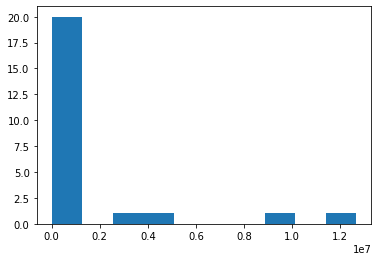

In [3]:
youtube_data.viewCount.hist(grid=False)

In [4]:
youtube_data.corr()

,viewCount,likeCount,dislikeCount,commentCount,favoriteCount
viewCount,1.000000,0.968416,0.824514,0.723747,NaN
likeCount,0.968416,1.000000,0.735649,0.679539,NaN
dislikeCount,0.824514,0.735649,1.000000,0.961489,NaN
commentCount,0.723747,0.679539,0.961489,1.000000,NaN
favoriteCount,NaN,NaN,NaN,NaN,NaN


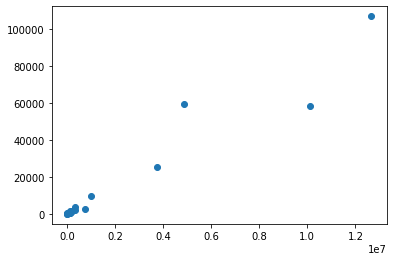

In [5]:
plt.scatter(youtube_data.viewCount, youtube_data.likeCount)

In [6]:
X, y = youtube_data.viewCount, youtube_data.likeCount
X = sm.add_constant(X)
lr_model = sm.OLS(y, X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              likeCount   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     331.9
Date:                Thu, 31 Dec 2020   Prob (F-statistic):           9.29e-15
Time:                        20:24:11   Log-Likelihood:                -244.40
No. Observations:                  24   AIC:                             492.8
Df Residuals:                      22   BIC:                             495.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        408.3661   1499.199      0.272      0.788   -2700.781    3517.514
viewCount      0.0077      0.000     18.217      0.000       0.007       0.009
==============================================================================
Omnibus:                       14.753   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               45.598
Skew:                           0.476   Prob(JB):                     1.25e-10
Kurtosis:                       9.685   Cond. No.                     3.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

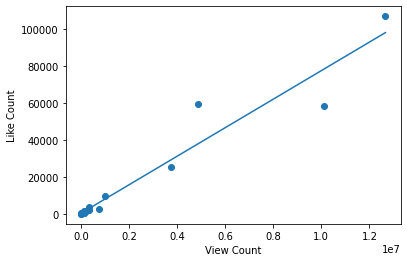

In [7]:
X_prime = np.linspace(X.viewCount.min(), X.viewCount.max(), 100)
X_prime = sm.add_constant(X_prime)

y_hat = lr_model.predict(X_prime)
plt.scatter(X.viewCount, y)
plt.xlabel("View Count")
plt.ylabel("Like Count")
plt.plot(X_prime[:, 1], y_hat)